# Compare QTLs with and without cell populations
- V02: compare top hit (the same variant in both analyses)


In [8]:
setwd("/frazer01/projects/GTEx_v7/analysis/eqtls_deconvolution")

In [9]:
invisible(suppressWarnings(file.link("/frazer01/home//matteo/notebooks/eqtls_deconvolution_gtex//analyze_qtl_results.ipynb", "analysis/analyze_qtl_results.ipynb")))

source("analysis/cardiac_qtls_packages.R"      )
source("analysis/cardiac_qtls_input_files.R"   )
source("analysis/cardiac_qtls_functions.R"     )
source("analysis/cardiac_qtls_input_data.R"    )
source("analysis/cardiac_qtls_load_metadata.R" )


Loading packages...
Loading input files...
Loading functions...
Loading input data...
Loading metadata...


In [62]:
qtls1 = read.table(paste("qtls/", "liver_original", "/analysis/egenes.", "liver_original", ".txt", sep = ""), header = TRUE)

In [63]:
str(qtls1)

'data.frame':	19621 obs. of  22 variables:
 $ gene_id    : chr  "ENSG00000000003.10" "ENSG00000000419.8" "ENSG00000000457.9" "ENSG00000000460.12" ...
 $ gene_name  : chr  "TSPAN6" "DPM1" "SCYL3" "C1orf112" ...
 $ gene_type  : chr  "protein_coding" "protein_coding" "protein_coding" "protein_coding" ...
 $ start      : int  99883666 49551403 169818771 169631244 27938574 196621007 143815947 53362138 41040683 24683488 ...
 $ end        : int  99894988 49575092 169863408 169823221 27961788 196716634 143832827 53481768 41067715 24743424 ...
 $ strand     : chr  "-" "-" "-" "+" ...
 $ gene_status: chr  "KNOWN" "KNOWN" "KNOWN" "KNOWN" ...
 $ source     : chr  "HAVANA" "HAVANA" "HAVANA" "HAVANA" ...
 $ level      : int  2 2 2 2 2 1 2 2 2 2 ...
 $ id         : chr  "X_99977643_C_CTAAA" "20_50496164_T_C" "1_169465997_G_A" "1_169615428_A_G" ...
 $ chrom      : chr  "X" "20" "1" "1" ...
 $ pos        : int  99977643 50496164 169465997 169615428 28692117 197645212 144267183 52547394 41243926 2452962

liver_original liver_cells liver
liver_original liver2_cells liver
liver_cells liver2_cells liver
skin_original skin_cells skin


tissue,tissue1,tissue2,genes,ns,only1,only2,both
liver,liver_original,liver_cells,17983,10743,0,5973,1267
liver,liver_original,liver2_cells,17757,8443,0,8068,1246
liver,liver_cells,liver2_cells,17832,8075,364,2491,6902
skin,skin_original,skin_cells,23082,9452,0,4668,8962


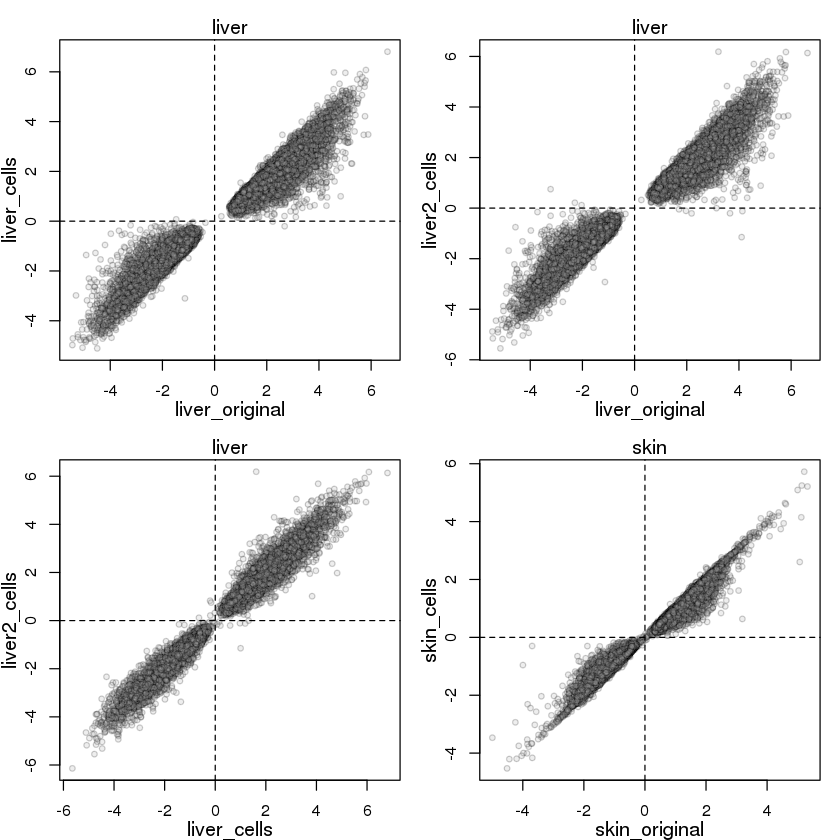

In [37]:
compare_qtls = function(tissue1, tissue2, tissue)
{
    message(paste(tissue1, tissue2, tissue))
    qtls1 = read.table(paste("qtls/", tissue1, "/analysis/egenes.", tissue1, ".txt", sep = ""), header = TRUE)
    qtls2 = read.table(paste("qtls/", tissue2, "/analysis/egenes.", tissue2, ".txt", sep = ""), header = TRUE)
    qtls1$gene_var = paste(qtls1$gene_id, qtls1$id)
    qtls2$gene_var = paste(qtls2$gene_id, qtls2$id)
    
    qtls  = merge(qtls1[,c("gene_var", "egene", "beta", "se", "bonferroni")], qtls2[,c("gene_var", "egene", "beta", "se", "bonferroni")], by = "gene_var", suffixes = 1:2)
    
    qtls$color = "#aaaaaa"
    qtls[qtls$egene1 == TRUE  & qtls$egene2 == TRUE , "color"] = "#ff0000"
    qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE, "color"] = "#ff00ff"
    qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE , "color"] = "#00ffff"
    qtls = rbind(qtls[qtls$egene1 == FALSE & qtls$egene2 == FALSE,],
                 qtls[qtls$egene1 == TRUE  & qtls$egene2 == TRUE ,],
                 qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE ,],
                 qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE,]
                )
    
    plot(qtls$beta1, qtls$beta2, bg = "#aaaaaa33", col = "#00000033", pch = 21, cex = 0.75, xlab = "", ylab = "", main = "")
    #smoothScatter(qtls$beta1, qtls$beta2, bg = qtls$color, xlab = "", ylab = "", main = "", nrpoints = 0)
    #points(qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE , "beta1"], qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE , "beta2"], bg = "#00ffff", pch = 21, cex = 0.75)
    #points(qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE, "beta1"], qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE, "beta2"], bg = "#ff00ff", pch = 21, cex = 0.75)
    
    abline(h = 0, lty = "dashed")
    abline(v = 0, lty = "dashed")
    mtext(text = tissue1, side = 1, line = 2  )
    mtext(text = tissue2, side = 2, line = 2  )
    mtext(text = tissue , side = 3, line = 0.1)
    
    #text(x = rep(min(qtls$beta1),5), y = (0:(-4)) + max(qtls$beta2), cex = 0.75, pos = 4,
    #     labels = c(paste("Genes", nrow(qtls1), sep = ": "),
    #                paste("Genes with the same top hit", nrow(qtls), sep = ": "),
    #                paste("eGenes", tissue1, "only:"   , nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE,]), sep = " "),
    #                paste("eGenes", tissue2, "only:"   , nrow(qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE ,]), sep = " "),
    #                paste("eGenes both tissues:"       , nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == TRUE ,]), sep = " ")))
    #
    #points(x = rep(min(qtls$beta1),3), y = (-2:(-4)) + max(qtls$beta2), pch = 21, bg = c("#ff00ff", "#00ffff", "#ff0000"))
    
    #legend("bottomright", pch = 21, pt.bg = c("#aaaaaa", "#ff00ff", "#00ffff", "#ff0000"),
    #       legend = c("Not significant", tissue1, tissue2, "Both"))
    
    write.table(qtls, file = paste("qtls", tissue1, tissue2, "txt", sep = "."), quote = FALSE, sep = "\t", row.names = FALSE, col.names = TRUE)
    
    return(data.frame(tissue  = tissue,
                      tissue1 = tissue1, 
                      tissue2 = tissue2, 
                      genes   = nrow(qtls), 
                      ns      = nrow(qtls[qtls$egene1 == FALSE & qtls$egene2 == FALSE,]),
                      only1   = nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE,]),
                      only2   = nrow(qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE ,]),
                      both    = nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == TRUE ,])
                     ))
    
    #return(list(#qtls1      = qtls1, 
    #            #qtls2      = qtls2,
    #            ttest_beta = t.test(abs(qtls$beta2), abs(qtls$beta1), paired = TRUE),
    #            ttest_se   = t.test(qtls$se2  , qtls$se1  , paired = TRUE)))
}

par(mfrow = c(2,2), mar = c(3,3,2,1))

out1 = compare_qtls("liver_original", "liver_cells" , "liver")
out2 = compare_qtls("liver_original", "liver2_cells", "liver")
out3 = compare_qtls("liver_cells"   , "liver2_cells", "liver")
out4 = compare_qtls("skin_original" , "skin_cells"  , "skin" )

qtls = rbind(out1, out2, out3, out4)

qtls

In [43]:
compare_qtls = function(tissue1, tissue2, tissue)
{
    message(paste(tissue1, tissue2, tissue))
    qtls1 = read.table(paste("qtls/", tissue1, "/analysis/egenes.", tissue1, ".txt", sep = ""), header = TRUE)
    qtls2 = read.table(paste("qtls/", tissue2, "/analysis/egenes.", tissue2, ".txt", sep = ""), header = TRUE)
    qtls1$gene_var = paste(qtls1$gene_id, qtls1$id)
    qtls2$gene_var = paste(qtls2$gene_id, qtls2$id)
    
    qtls  = merge(qtls1[,c("gene_id", "gene_var", "egene", "beta", "se", "bonferroni")], qtls2[,c("gene_id", "gene_var", "egene", "beta", "se", "bonferroni")], by = "gene_id", suffixes = 1:2)
    
    
    out = data.frame(tissue  = tissue,
                     tissue1 = tissue1, 
                     tissue2 = tissue2, 
                     genes   = nrow(qtls), 
                     same_top = nrow(qtls[qtls$gene_var1 == qtls$gene_var2,]),
                     ns      = nrow(qtls[qtls$egene1 == FALSE & qtls$egene2 == FALSE,]),
                     only1   = nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE,]),
                     only2   = nrow(qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE ,]),
                     both    = nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == TRUE ,])
                    )
    return(out)
    
    #return(list(#qtls1      = qtls1, 
    #            #qtls2      = qtls2,
    #            ttest_beta = t.test(abs(qtls$beta2), abs(qtls$beta1), paired = TRUE),
    #            ttest_se   = t.test(qtls$se2  , qtls$se1  , paired = TRUE)))
}


out1 = compare_qtls("liver_original", "liver_cells" , "liver")
out2 = compare_qtls("liver_original", "liver2_cells", "liver")
out3 = compare_qtls("liver_cells"   , "liver2_cells", "liver")
out4 = compare_qtls("skin_original" , "skin_cells"  , "skin" )

qtls = rbind(out1, out2, out3, out4)


liver_original liver_cells liver
liver_original liver2_cells liver
liver_cells liver2_cells liver
skin_original skin_cells skin


tissue,tissue1,tissue2,genes,same_top,ns,only1,only2,both
liver,liver_original,liver_cells,19621,17983,11781,0,6471,1369
liver,liver_original,liver2_cells,19621,17757,9444,0,8808,1369
liver,liver_cells,liver2_cells,19621,17832,9023,421,2758,7419
skin,skin_original,skin_cells,24029,23082,9855,0,4942,9232


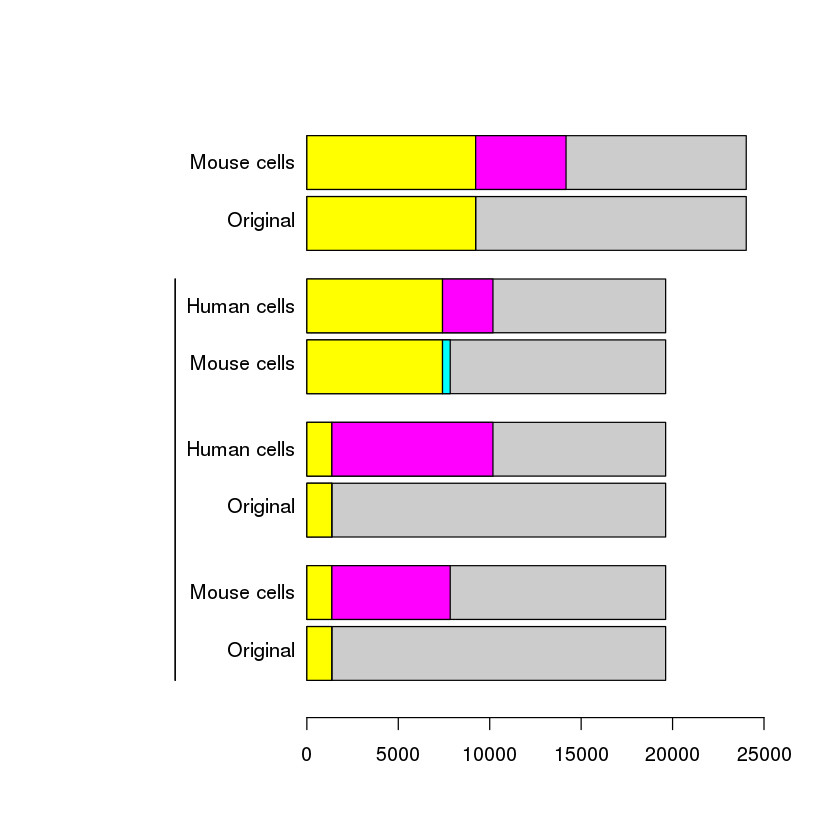

In [61]:
qtls$x = 1:nrow(qtls)

plot(1,1, type = "n", ylim = c(0.5, nrow(qtls) + 0.5), xlim = c(-10000, 25000), xlab = "", ylab = "", axes = FALSE)
axis(1, at = c(0:5) * 5000, labels = c(0:5) * 5000)
text(x = 0, y = qtls$x - 0.2, labels = c("Original"   , "Original"   , "Mouse cells", "Original"   ), pos = 2)
text(x = 0, y = qtls$x + 0.2, labels = c("Mouse cells", "Human cells", "Human cells", "Mouse cells"), pos = 2)

rect(ybottom = qtls$x - 0.4, xleft = 0        , ytop = qtls$x - 0.025, xright = qtls$genes, col = "#cccccc")
rect(ybottom = qtls$x + 0.4, xleft = 0        , ytop = qtls$x + 0.025, xright = qtls$genes, col = "#cccccc")
rect(ybottom = qtls$x - 0.4, xleft = 0        , ytop = qtls$x - 0.025, xright = qtls$both , col = "#ffff00")
rect(ybottom = qtls$x + 0.4, xleft = 0        , ytop = qtls$x + 0.025, xright = qtls$both , col = "#ffff00")
rect(ybottom = qtls$x - 0.4, xleft = qtls$both, ytop = qtls$x - 0.025, xright = qtls$both + qtls$only1, col = "#00ffff")
rect(ybottom = qtls$x + 0.4, xleft = qtls$both, ytop = qtls$x + 0.025, xright = qtls$both + qtls$only2, col = "#ff00ff")

segments(x0 = -7200, y0 = 0.6, y1 = 3.4)
segments(x0 = -7200, y0 = 0.6, y1 = 3.4)


In [42]:
data.frame(tissue  = tissue,
           tissue1 = tissue1, 
           tissue2 = tissue2, 
           genes   = nrow(qtls), 
           same_top = nrow(qtls[qtls$gene_var1 == qtls$gene_var2,]),
           ns      = nrow(qtls[qtls$egene1 == FALSE & qtls$egene2 == FALSE,]),
           only1   = nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == FALSE,]),
           only2   = nrow(qtls[qtls$egene1 == FALSE & qtls$egene2 == TRUE ,]),
           both    = nrow(qtls[qtls$egene1 == TRUE  & qtls$egene2 == TRUE ,])
          )

a,genes,same_top,ns,only1,only2,both
1,19621,17983,11781,0,6471,1369


In [40]:
str(qtls)

'data.frame':	19621 obs. of  11 variables:
 $ gene_id    : chr  "ENSG00000000003.10" "ENSG00000000419.8" "ENSG00000000457.9" "ENSG00000000460.12" ...
 $ gene_var1  : chr  "ENSG00000000003.10 X_99977643_C_CTAAA" "ENSG00000000419.8 20_50496164_T_C" "ENSG00000000457.9 1_169465997_G_A" "ENSG00000000460.12 1_169615428_A_G" ...
 $ egene1     : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ beta1      : num  -2.36 2.16 -1.03 1.42 -3.81 ...
 $ se1        : num  0.614 0.522 0.263 0.335 0.919 ...
 $ bonferroni1: num  1 0.506 1 0.151 0.328 ...
 $ gene_var2  : chr  "ENSG00000000003.10 X_100734292_CCACACACA_C" "ENSG00000000419.8 20_50496164_T_C" "ENSG00000000457.9 1_169465997_G_A" "ENSG00000000460.12 1_169615428_A_G" ...
 $ egene2     : logi  TRUE FALSE FALSE TRUE TRUE TRUE ...
 $ beta2      : num  1.26 2.02 -1.01 1.18 -2.81 ...
 $ se2        : num  0.346 0.536 0.24 0.288 0.771 ...
 $ bonferroni2: num  0.03003 0.43016 0.19925 0.00246 0.00596 ...
